In [1]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
merged_files_filtered = pd.read_csv('./data/stress_urinary_incontinence.csv')

In [5]:
merged_files_filtered['FOI_TEXT'].tail()

9600    DATE OF EVENT: THE EXACT EVENT ONSET DATE IS U...
9601    (B)(6). THE COMPLAINANT WAS UNABLE TO PROVIDE ...
9602    IT WAS REPORTED TO BOSTON SCIENTIFIC CORPORATI...
9603    IT WAS REPORTED TO BOSTON SCIENTIFIC CORPORATI...
9604    (B)(6). THE COMPLAINANT WAS UNABLE TO PROVIDE ...
Name: FOI_TEXT, dtype: object

In [6]:
merged_files_filtered['DATE_RECEIVED'] = pd.to_datetime(merged_files_filtered['DATE_RECEIVED'])

# Perform sentiment analysis using the VADER lexicon
sia = SentimentIntensityAnalyzer()
merged_files_filtered['sentiment'] = merged_files_filtered['FOI_TEXT'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Create a year column based on the DATE_RECEIVED column
merged_files_filtered['year'] = merged_files_filtered['DATE_RECEIVED'].dt.year

# Group the data by year and sentiment and count the number of reviews in each group
grouped_data = merged_files_filtered.groupby(['year', 'sentiment'])['FOI_TEXT'].count().reset_index()

# Pivot the data to create a matrix with years as rows, sentiment as columns, and review counts as values
pivoted_data = grouped_data.pivot(index='year', columns='sentiment', values='FOI_TEXT').fillna(0)

In [36]:
x="THE PATIENT'S ATTORNEY ALLEGED A DEFICIENCY AGAINST THE DEVICE RESULTING IN AN UNSPECIFIED ADVERSE OUTCOME"

In [37]:
sia.polarity_scores(x)

{'neg': 0.161, 'neu': 0.839, 'pos': 0.0, 'compound': -0.3612}

In [38]:
merged_files_filtered[merged_files_filtered['cluster']==2].head(10)

,Unnamed: 0,MDR_REPORT_KEY,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,...,DATE_RETURNED_TO_MANUFACTURER,DEVICE_REPORT_PRODUCT_CODE,DEVICE_AGE_TEXT,DEVICE_EVALUATED_BY_MANUFACTUR,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,sentiment,year,cluster
0,106741,6383024,106903842,N,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,-0.2960,2017,2
1,106742,6383024,106903843,D,1,NaN,BASED ON ADDITIONAL INFORMATION RECEIVED THIS ...,NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,-0.2960,2017,2
2,144133,6383024,109652829,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,0.0000,2017,2
3,703424,6383024,69202956,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,-0.0351,2017,2
5,114383,6343125,107384375,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,0.0000,2017,2
6,615600,6343125,67805415,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). LOT NUM...,NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,-0.0351,2017,2
8,128541,6385690,108434001,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,0.0000,2017,2
9,712346,6385690,69323466,N,1,NaN,MANUFACTURER REFERENCE NUMBER: (B)(4). INCIDEN...,NaN,NaN,NaN,...,NaN,OTN,DA,N,N,NaN,NaN,-0.0351,2017,2
11,136797,7060626,109137189,N,1,NaN,MEDTRONIC COMPLAINT REPORT: (B)(4). IF INFORMA...,NaN,NaN,NaN,...,NaN,OTN,DA,*,N,NaN,NaN,-0.2960,2017,2
13,141414,6493045,109407059,N,1,NaN,"IF INFORMATION IS PROVIDED IN THE FUTURE, A SU...",NaN,NaN,NaN,...,NaN,OTN,DA,*,N,NaN,NaN,0.0000,2017,2


In [10]:
# Perform K-Means clustering on the sentiment scores, with 3 clusters (negative, neutral, positive)
kmeans = KMeans(n_clusters=3, random_state=0).fit(merged_files_filtered[['sentiment']])

# Add a cluster column to the data
merged_files_filtered['cluster'] = kmeans.labels_

# Group the data by year and cluster and count the number of reviews in each group
grouped_data = merged_files_filtered.groupby(['year', 'cluster'])['FOI_TEXT'].count().reset_index()

# Pivot the data to create a matrix with years as rows, clusters as columns, and review counts as values
pivoted_data = grouped_data.pivot(index='year', columns='cluster', values='FOI_TEXT').fillna(0)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [30]:
pivoted_data.head(10)

cluster,0,1,2
year,,,
2017,95,295,251
2018,66,288,298
2019,107,664,498
2020,93,762,310
2021,256,2758,355
2022,169,848,345
2023,93,693,361


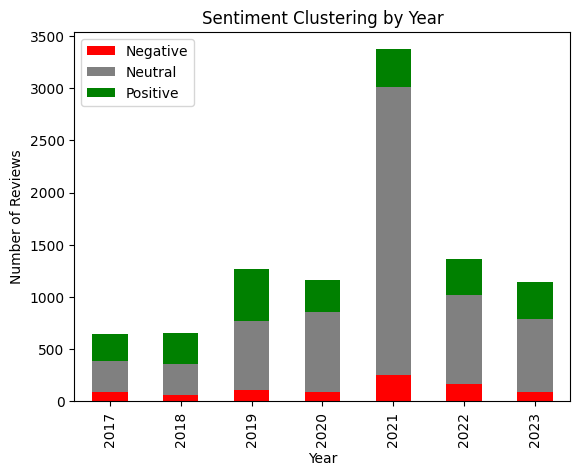

In [11]:
colors = ['r', 'gray', 'g']
labels = ['Negative', 'Neutral', 'Positive']
pivoted_data.plot(kind='bar', stacked=True, color=colors)
plt.title('Sentiment Clustering by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reviews')
plt.legend(labels=labels, loc='upper left')
plt.show()